In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, warnings
from mpl_toolkits.basemap import Basemap
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import LabelEncoder

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
file_list = check_output(["ls", "../input"]).decode("utf8")
file_list = file_list.strip().split('\n')

air_reserve.csv
air_store_info.csv
air_visit_data.csv
date_info.csv
hpg_reserve.csv
hpg_store_info.csv
sample_submission.csv
store_id_relation.csv



# Read data and display info

In [3]:
for index, file in enumerate(file_list):
    var_name = file.rstrip('.csv')
    locals()[var_name] = pd.read_csv('../input/' + file)
    print(file)
    
    # convert to datetime
    for col in locals()[var_name].columns:
        if col.endswith('datetime') or col.endswith('date'):
            locals()[var_name][col] = pd.to_datetime(locals()[var_name][col])
    
    print('Shape:', locals()[var_name].shape)
    print('\n')
    print(locals()[var_name].info())
    print('\n')
    print(locals()[var_name].head())
    print('***********************************************************************************')

air_reserve.csv
Shape: (92378, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB
None


           air_store_id      visit_datetime    reserve_datetime  \
0  air_877f79706adbfb06 2016-01-01 19:00:00 2016-01-01 16:00:00   
1  air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00   
3  air_877f79706adbfb06 2016-01-01 20:00:00 2016-01-01 16:00:00   
4  air_db80363d35f10926 2016-01-01 20:00:00 2016-01-01 01:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 6  
3                 2  
4                 5  
**************************************************************

In [4]:
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


# Store Distribution map

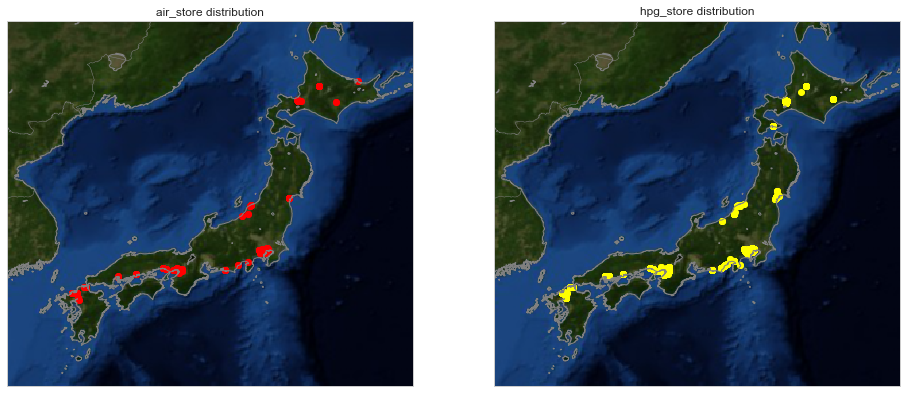

In [5]:
fig,ax = plt.subplots(1,2,figsize = (16,16))

color = ['red','yellow']
title = ['air_store distribution', 'hpg_store distribution']
for i,data in enumerate([air_store_info,hpg_store_info]):
    m = Basemap(resolution = 'h',lon_0 = 0, lat_0 = 0,llcrnrlon=127, urcrnrlon=147,
                      llcrnrlat=29, urcrnrlat=47, ax = ax[i])
    m.bluemarble()
    m.drawcoastlines(color = 'gray')
    m.drawcountries(color = 'gray')
    m.drawstates(color = 'gray')
    m.scatter(data['longitude'], data['latitude'], latlon = True, color = color[i], marker='o')
    ax[i].set_title(title[i])

# Visitors visualization

Aggregated vistors by visit date

[Text(0,0.5,'Dailyvisitors'), Text(0.5,0,'')]

[Text(0,0.5,'Weeklyvisitors'), Text(0.5,0,'')]

[Text(0,0.5,'Monthlyvisitors'), Text(0.5,0,'')]

Text(0.5,0,'visit date')

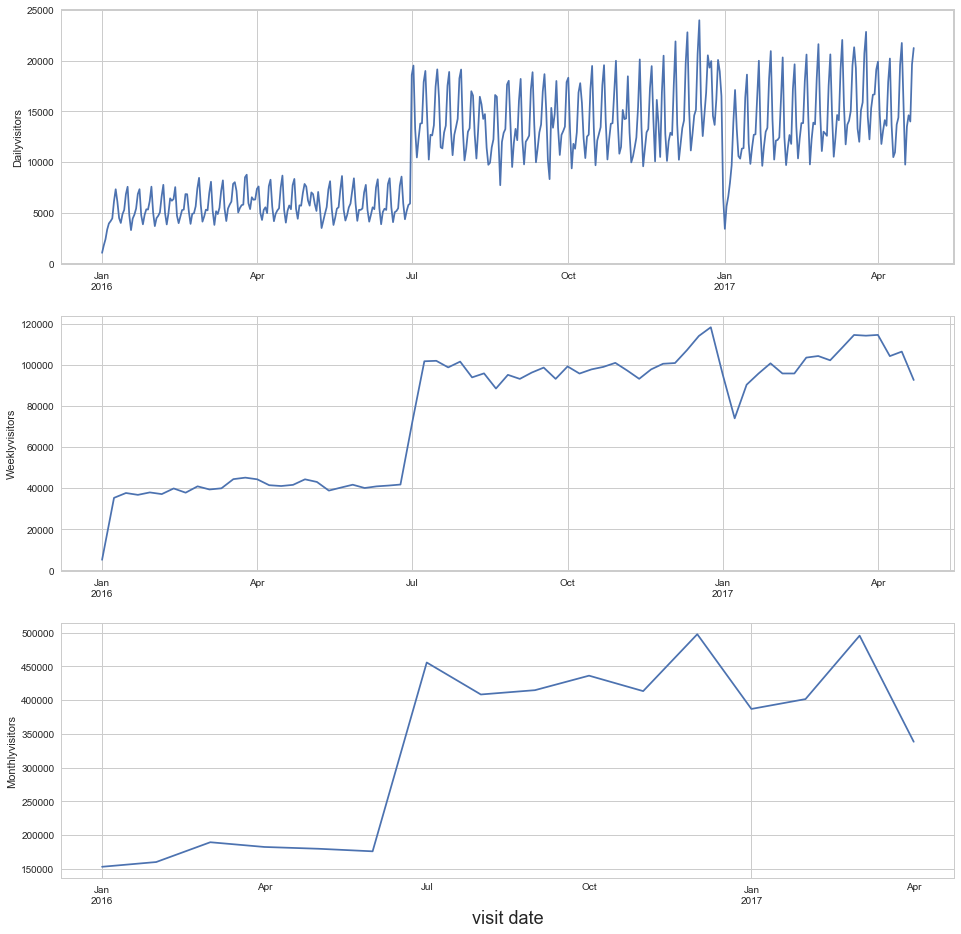

In [4]:
fig,ax = plt.subplots(3,1, figsize = (16,16))
Fre = ["Daily", "Weekly", "Monthly"]

for i,fre in enumerate(["D","W","M"]):
    air_visit_data.groupby('visit_date')['visitors'].sum().resample(fre).sum().plot(ax = ax[i])
    ax[i].set(ylabel = (Fre[i] + 'visitors'), xlabel = "")
plt.xlabel('visit date', fontsize = 18)

Let's get deeper into Reservasion dataset.

In [19]:
# convert hpg_store_id to air_store_id
hpg_reserve = hpg_reserve.merge(store_id_relation, on = 'hpg_store_id', how = 'left')
air = hpg_reserve['air_store_id']
hpg_reserve['hpg_store_id'] = air
hpg_reserve = hpg_reserve[hpg_reserve['hpg_store_id'].notnull()]
hpg_reserve = hpg_reserve.drop('air_store_id', axis = 1)
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,delta_reservation
103,air_db80363d35f10926,2016-01-01 19:00:00,2016-01-01 15:00:00,4,04:00:00
121,air_08cb3c4ee6cd6a22,2016-01-01 19:00:00,2016-01-01 16:00:00,2,03:00:00
272,air_6b15edd1b4fbb96a,2016-01-02 17:00:00,2016-01-01 22:00:00,3,19:00:00
348,air_37189c92b6c761ec,2016-01-02 18:00:00,2016-01-02 17:00:00,2,01:00:00
349,air_37189c92b6c761ec,2016-01-02 18:00:00,2016-01-01 20:00:00,2,22:00:00


In [20]:
# add new feature, combine two dataset
def delta_reservation(df):
    df['delta_reservation'] = df['visit_datetime'] - df['reserve_datetime']
    df['delta_2days'] = df['delta_reservation'].apply(lambda x: int(x.days < 2))
    df['delta_7days'] = df['delta_reservation'].apply(lambda x: int(2 <= x.days < 7))
    df['delta_long'] = df['delta_reservation'].apply(lambda x: int(x.days >= 7))
    return df

air_reserve = delta_reservation(air_reserve)
hpg_reserve = delta_reservation(hpg_reserve)

air_reserve.rename(columns = {'air_store_id':'store_id'}, inplace = True)
hpg_reserve.rename(columns = {'hpg_store_id':'store_id'}, inplace = True)
total_reserve = pd.concat([air_reserve, hpg_reserve])
total_reserve['date'] = total_reserve['visit_datetime'].apply(lambda x:x.date())
total_reserve.head()

,store_id,visit_datetime,reserve_datetime,reserve_visitors,delta_reservation,delta_2days,delta_7days,delta_long,date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,03:00:00,1,0,0,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,00:00:00,1,0,0,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,00:00:00,1,0,0,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,04:00:00,1,0,0,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,19:00:00,1,0,0,2016-01-01


How many unique stores are reserved? How many unique stores are visited?

In [7]:
num_reserve = total_reserve['store_id'].nunique()
num_visit = air_visit_data['air_store_id'].nunique()
print("{} stores are reserved".format(num_reserve))
print("{} stores are visited".format(num_visit))

333 stores are reserved
829 stores are visited


Text(0,0.5,'Visitors')

Text(0.5,0,'Date')

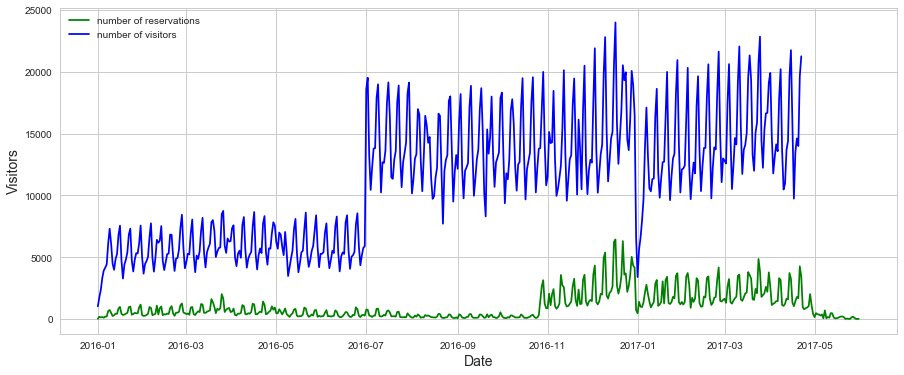

In [8]:
reserve_by_date = total_reserve.groupby('date').sum().reset_index()
visit_by_date = air_visit_data.groupby('visit_date').sum().reset_index()

plt.plot(reserve_by_date['date'], reserve_by_date['reserve_visitors'], color = 'green', label = 'number of reservations')
plt.plot(visit_by_date['visit_date'], visit_by_date['visitors'], color = 'blue', label = 'number of visitors')
plt.legend(loc = 'upper left')
plt.ylabel('Visitors', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

Is the increse at 2016-07 cause by an increase in the number of stores?

In [9]:
air_visit_data_05 = air_visit_data[(air_visit_data['visit_date'].apply(lambda x: x.year) == 2016) & (air_visit_data['visit_date'].apply(lambda x: x.month) < 6)]
air_visit_data_07 = air_visit_data[(air_visit_data['visit_date'].apply(lambda x: x.year) == 2016) & (air_visit_data['visit_date'].apply(lambda x: x.month) > 7)]
air_visit_data_05['air_store_id'].nunique()
air_visit_data_07['air_store_id'].nunique()

316

818

What time do people usually make a reservation and visit?

([<matplotlib.axis.XTick at 0x28ce5fb1860>,
 <a list of 6 Text xticklabel objects>)

Text(0,0.5,'reserve visitors')

Text(0.5,0,'time')

(0, 86400)

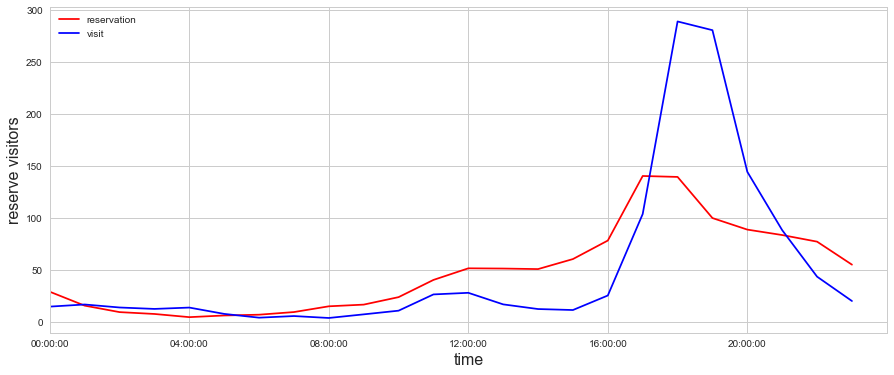

In [10]:
df1 = total_reserve.groupby('reserve_datetime')['reserve_visitors'].sum()
reserve_time = df1.groupby(df1.index.time).mean().reset_index()

df2 = total_reserve.groupby('visit_datetime')['reserve_visitors'].sum()
visit_time = df2.groupby(df2.index.time).mean().reset_index()

hourly_ticks = 4 * 60 * 60 * np.arange(6) #4 hours per interval, 60 min per hour, 60 second per min, 6(24/4)
plt.plot(reserve_time['index'], reserve_time['reserve_visitors'],color = 'red', label = 'reservation')
plt.plot(visit_time['index'], visit_time['reserve_visitors'], color = 'blue', label = 'visit')
plt.xticks(hourly_ticks)
plt.legend(loc = 'upper left')
plt.ylabel('reserve visitors', fontsize = 16)
plt.xlabel('time', fontsize = 16)
plt.xlim(0,4 * 60 * 60 * 6)

What day of week do people usually reserve and visit?

Text(0,0.5,'reserve visitors')

Text(0.5,0,'day of week')

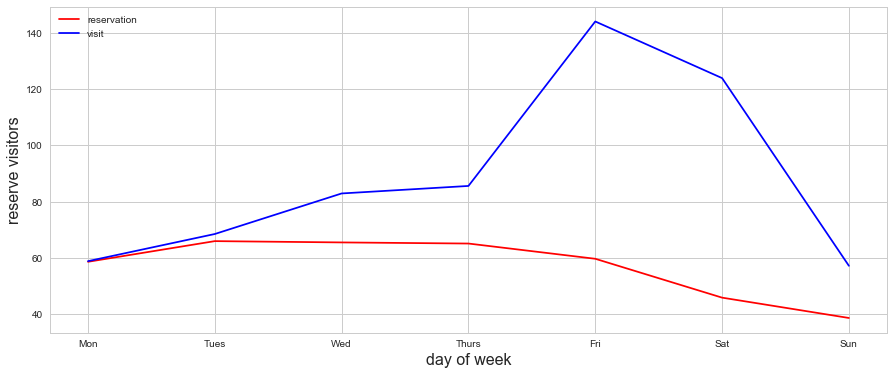

In [11]:
by_weekday_df1 = df1.groupby(df1.index.dayofweek).mean()
by_weekday_df1.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday_df1.plot(color = 'red', label = 'reservation')

by_weekday_df2 = df2.groupby(df2.index.dayofweek).mean()
by_weekday_df2.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday_df2.plot(color = 'blue', label = 'visit')
plt.legend(loc = 'upper left')
plt.ylabel('reserve visitors', fontsize = 16)
plt.xlabel('day of week', fontsize = 16)

(0, 86400)

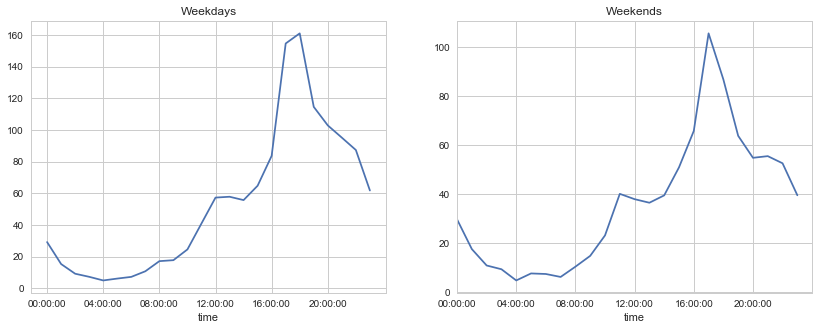

In [12]:
weekend = np.where(df1.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df1.groupby([weekend, df1.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks)
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks);
plt.xlim(0,4 * 60 * 60 * 6)

What are the distribution of time period between reserve and visit?

Text(0,0.5,'count')

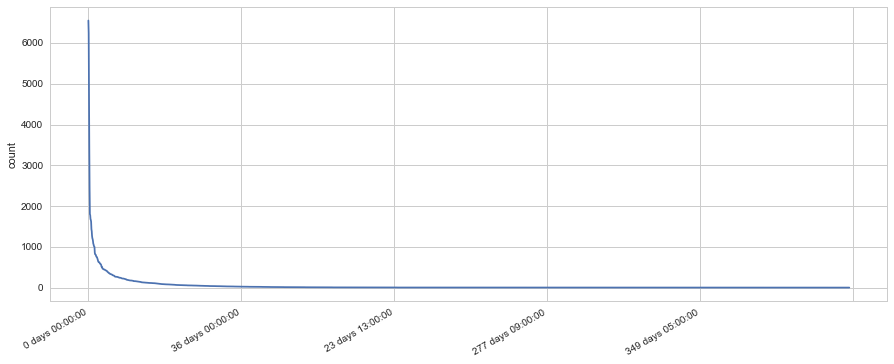

In [13]:
#####change!!!!!!!!!!!!!!!!!!!!!
total_reserve['delta_reservation'].value_counts().plot()
plt.ylabel('count')

In [14]:
type(hourly_ticks)

numpy.ndarray

How many visitors for each time period?

Text(0,0.5,'reserve_visitors')

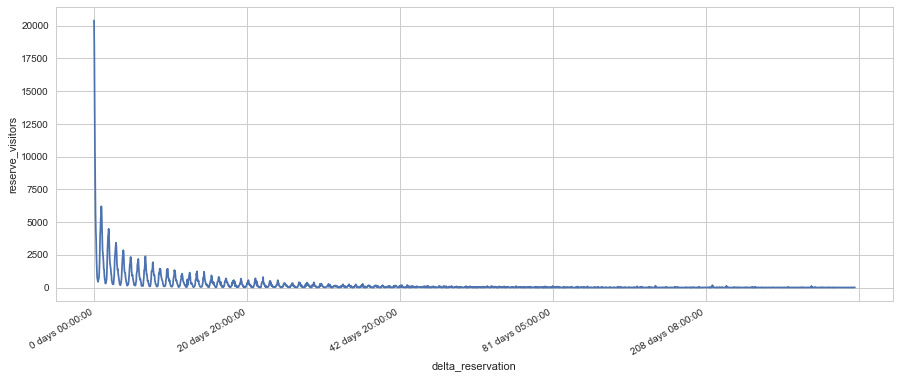

In [15]:
total_reserve.groupby('delta_reservation')['reserve_visitors'].sum().plot()
plt.ylabel('reserve_visitors')

What are the distribution of air_genre_name and air_area_name?

What is the holiday influence?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

Text(0,0.5,'visitors')

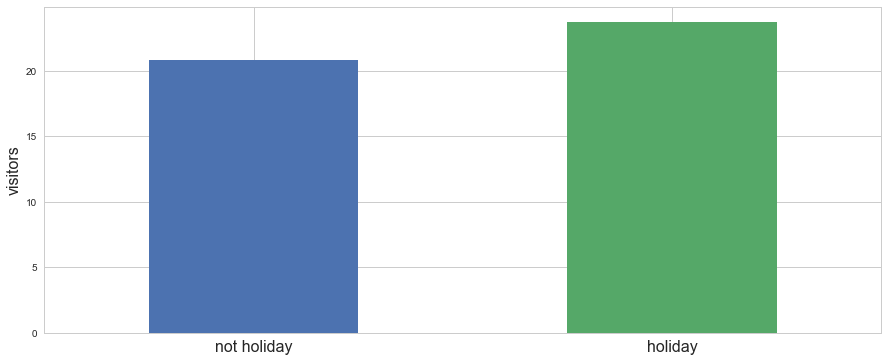

In [16]:
date_info = date_info.rename(columns = {'calendar_date':'visit_date'})
air_holiday = air_visit_data.merge(date_info, how = 'inner', on = 'visit_date')
holiday = air_holiday.groupby('holiday_flg')['visitors'].mean()
holiday.index = ['not holiday', 'holiday']
holiday.plot(kind = 'bar')
plt.xticks(rotation = 'horizontal', fontsize = 16)
plt.ylabel('visitors', fontsize =16)

Seems holiday has even a positive influence.

Which restaurants are similar? Cluster
K-means
plotly

Cluster EDA  ---> decide number of clusters
scatter plot
PCA/Cluster
PCA more deeply

counts per hour per restaurant

median income 
median price for the home
population
demographoic
how does sensonality affact data?
how many restaurant in the city?
Urban/Rural Area Classification

# Store information (Area and Genre)

In [9]:
store_info = air_visit_data.copy()
store_info = store_info.merge(air_store_info,on = "air_store_id", how = 'inner')
store_info['air_store_id'].nunique()
store_info.head()

829

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


## Area

In [10]:
store_info["area1"],store_info["area2"],store_info["area3"] = store_info["air_area_name"].str.split(' ', 2).str
store_info.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
1,air_ba937bf13d40fb24,2016-01-14,32,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
2,air_ba937bf13d40fb24,2016-01-15,29,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
3,air_ba937bf13d40fb24,2016-01-16,22,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
4,air_ba937bf13d40fb24,2016-01-18,6,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen


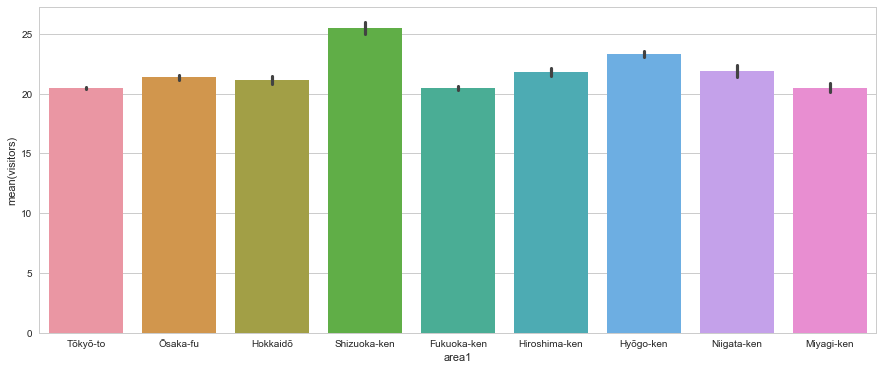

In [11]:
#area1 = store_info.groupby("area1")["visitors"].mean().reset_index()
#area1.head(3)
sns.barplot(x = store_info["area1"], y=store_info["visitors"])

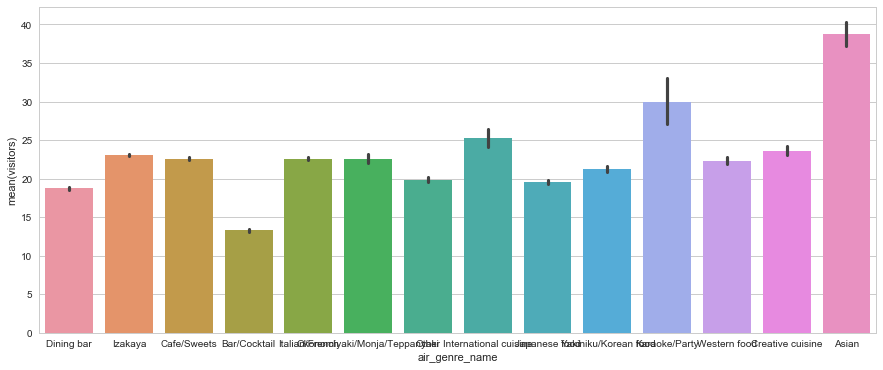

In [13]:
sns.barplot(x = store_info["air_genre_name"], y=store_info["visitors"])

In [12]:
genre_area = store_info.groupby(["area1","air_genre_name"])["visitors"].aggregate([max,np.median,np.mean]).reset_index()
genre_area.rename(columns={'max': 'area1_genre_max', 'median': 'area1_genre_median','mean': 'area1_genre_mean'},inplace=True)
genre_area.head(3)

,area1,air_genre_name,area1_genre_max,area1_genre_median,area1_genre_mean
0,Fukuoka-ken,Bar/Cocktail,118,9.0,12.001578
1,Fukuoka-ken,Cafe/Sweets,627,16.0,21.050838
2,Fukuoka-ken,Creative cuisine,88,16.0,20.742284


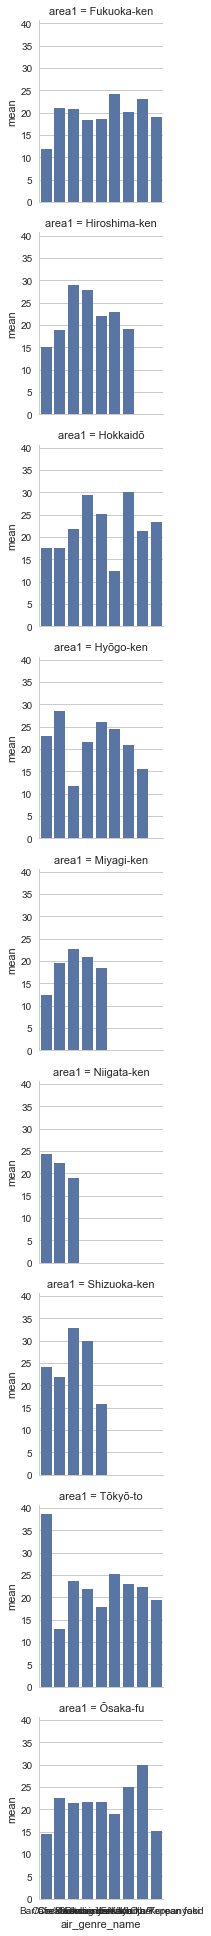

In [78]:
g = sns.FacetGrid(genre_area, row="area1")
g = g.map(sns.barplot, "air_genre_name", "mean")
#plt.tight_layout()

# Model Data Prepare

## Initialize train and text, merge with visit date (weekday and holiday)

In [7]:
train = air_visit_data.copy()
date_info = date_info.rename(columns = {'calendar_date':'visit_date'})
train = train.merge(date_info, how = 'left', on = 'visit_date')
#train = train.join(pd.get_dummies(train["day_of_week"],drop_first=True))
train["day_of_week"] = train["visit_date"].dt.weekday  #0 is monday, 6 is Sunday
train["fri_or_sat"] = train["day_of_week"].apply(lambda x: 1 if (x == 4 or x ==5) else 0)
train["month"] = train["visit_date"].dt.month
train.head()

test = sample_submission.copy()
test["air_store_id"] = test["id"].apply(lambda x: x[0:20])
test["visit_date"] = test["id"].apply(lambda x: x[21:])
test["visit_date"] = pd.to_datetime(test["visit_date"]) 
test = test.merge(date_info, how = 'left', on = 'visit_date')
#test = test.join(pd.get_dummies(train["day_of_week"],drop_first=True))
test["day_of_week"] = test["visit_date"].dt.weekday  #0 is monday, 6 is Sunday
test["fri_or_sat"] = test["day_of_week"].apply(lambda x: 1 if (x == 4 or x ==5) else 0)
test["month"] = test["visit_date"].dt.month
test.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,fri_or_sat,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,0,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,0,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,0,1


,id,visitors,air_store_id,visit_date,day_of_week,holiday_flg,fri_or_sat,month
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6,0,0,4
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,0,0,4
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1,0,0,4
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2,0,0,4
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3,0,0,4


## Merge with store information (gerne and area)

In [33]:
train = train.merge(air_store_info,on = "air_store_id", how = 'inner')
train["area1"],train["area2"],train["area3"] = train["air_area_name"].str.split(' ', 2).str
train = train.merge(genre_area,on = ["air_genre_name","area1"],how = "left")
#train = train.join(pd.get_dummies(train["air_genre_name"],drop_first=True))
#train = train.join(pd.get_dummies(train["area2"],drop_first=True))
#train = train.drop(['air_genre_name','air_area_name','area2','latitude','longitude'], axis = 1)
train.head(3)

test = test.merge(air_store_info,on = "air_store_id", how = 'inner')
test["area1"],test["area2"],test["area3"] = test["air_area_name"].str.split(' ', 2).str
test = test.merge(genre_area,on = ["air_genre_name","area1"],how = "left")
#test = test.join(pd.get_dummies(test["air_genre_name"],drop_first=True))
#test = test.join(pd.get_dummies(test["area2"],drop_first=True))
#test = test.drop(['air_genre_name','air_area_name','latitude','longitude'], axis = 1)

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,fri_or_sat,month,air_genre_name,air_area_name,latitude,...,max_weekday,median_weekday,mean_weekday,reserve_visitors,delta_2days,delta_7days,delta_long,area1_genre_max,area1_genre_median,area1_genre_mean
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,57,25.0,23.843750,-999.0,NaN,NaN,NaN,348,14.0,17.928582
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,54,21.0,20.292308,-999.0,NaN,NaN,NaN,348,14.0,17.928582
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,61,35.0,34.738462,-999.0,NaN,NaN,NaN,348,14.0,17.928582


In [39]:
for f in train.iloc[:,1:].columns: 
    if train[f].dtype=='object':
        print(f)
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values.astype('str')) + list(test[f].values.astype('str')))
        train[f] = lbl.transform(list(train[f].values.astype('str')))
        test[f] = lbl.transform(list(test[f].values.astype('str')))

air_genre_name


LabelEncoder()

air_area_name


LabelEncoder()

area1


LabelEncoder()

area2


LabelEncoder()

area3


LabelEncoder()

## Merge with min/max/mean/median visit by store

In [15]:
visit_by_store = train.groupby(["air_store_id"])["visitors"].aggregate([min,max,np.median,np.mean]).reset_index()
train = train.merge(visit_by_store,how = "left", on = "air_store_id")
test = test.merge(visit_by_store,how = "left", on = "air_store_id")
train.head(3)

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,fri_or_sat,month,air_genre_name,air_area_name,latitude,longitude,area1,area2,area3,min,max,median,mean
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,1,61,22.0,22.782609
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,1,61,22.0,22.782609
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,1,61,22.0,22.782609


## Merge with min/max/mean/median visit by store on same weekday

In [16]:
visit_by_store_weekly = train.groupby(["air_store_id","day_of_week"])["visitors"].aggregate([min,max,np.median,np.mean]).reset_index()
train = train.merge(visit_by_store_weekly,how = "left", on = ["air_store_id","day_of_week"], suffixes=["_all", "_weekday"])
test = test.merge(visit_by_store_weekly,how = "left", on = ["air_store_id","day_of_week"], suffixes=["_all", "_weekday"])
train.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,fri_or_sat,month,air_genre_name,air_area_name,latitude,...,area2,area3,min_all,max_all,median_all,mean_all,min_weekday,max_weekday,median_weekday,mean_weekday
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,Minato-ku,Shibakōen,1,61,22.0,22.782609,7,57,25.0,23.843750
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,Minato-ku,Shibakōen,1,61,22.0,22.782609,2,54,21.0,20.292308
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,Minato-ku,Shibakōen,1,61,22.0,22.782609,4,61,35.0,34.738462
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,Minato-ku,Shibakōen,1,61,22.0,22.782609,6,53,27.0,27.651515
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,Minato-ku,Shibakōen,1,61,22.0,22.782609,2,34,12.0,13.754386


## Merge with reserve by date

In [21]:
reserve_by_date = total_reserve.groupby(["store_id","date"]).sum().reset_index()
reserve_by_date = reserve_by_date.rename(columns = {'store_id':'air_store_id','date':'visit_date'})
reserve_by_date["visit_date"] = pd.to_datetime(reserve_by_date["visit_date"])

train = train.merge(reserve_by_date, how = "left", on=["air_store_id","visit_date"])
test = test.merge(reserve_by_date, how = "left", on=["air_store_id","visit_date"])
train.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,fri_or_sat,month,air_genre_name,air_area_name,latitude,...,median_all,mean_all,min_weekday,max_weekday,median_weekday,mean_weekday,reserve_visitors,delta_2days,delta_7days,delta_long
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,22.0,22.782609,7,57,25.0,23.843750,NaN,NaN,NaN,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,22.0,22.782609,2,54,21.0,20.292308,NaN,NaN,NaN,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,22.0,22.782609,4,61,35.0,34.738462,NaN,NaN,NaN,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,22.0,22.782609,6,53,27.0,27.651515,NaN,NaN,NaN,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,...,22.0,22.782609,2,34,12.0,13.754386,NaN,NaN,NaN,NaN


In [23]:
print("There are {} unique restaurants in train data set, while just {} of them have reservation.".format(
    train["air_store_id"].nunique(),reserve_by_date["air_store_id"].nunique()))

There are 829 unique restaurants in train data set, while just 333 of them have reservation.


For restaurants that can have reservation, fill na with 0 (means, no reservation on that day)

In [24]:
train.loc[train["air_store_id"].isin(reserve_by_date["air_store_id"].unique()),"reserve_visitors"] = \
train[train["air_store_id"].isin(reserve_by_date["air_store_id"].unique())]["reserve_visitors"].fillna(0)

test.loc[test["air_store_id"].isin(reserve_by_date["air_store_id"].unique()),"reserve_visitors"] = \
test[test["air_store_id"].isin(reserve_by_date["air_store_id"].unique())]["reserve_visitors"].fillna(0)

For testaurants that never have reservation, fill na with -999

In [25]:
train.loc[~train["air_store_id"].isin(reserve_by_date["air_store_id"].unique()),"reserve_visitors"] = \
train[~train["air_store_id"].isin(reserve_by_date["air_store_id"].unique())]["reserve_visitors"].fillna(-999)

test.loc[~test["air_store_id"].isin(reserve_by_date["air_store_id"].unique()),"reserve_visitors"] = \
test[~test["air_store_id"].isin(reserve_by_date["air_store_id"].unique())]["reserve_visitors"].fillna(-999)

# Modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [48]:
Xtrain = train.drop(["visitors","air_store_id","visit_date","delta_7days","day_of_week","air_area_name"],axis=1)
Xtrain = Xtrain.fillna(-999)
Ytrain = train["visitors"]

Xtest = test.drop(["id","visitors","air_store_id","visit_date","delta_7days","day_of_week","air_area_name"],axis=1)
Xtest = Xtest.fillna(-999)

In [49]:
train_x, test_x, train_y, test_y = \
train_test_split(Xtrain, Ytrain, random_state=1026, test_size=0.2)

In [42]:
def rmsle(y, yp): 
    """
    Compute the Root Mean Squared Log Error for hypthesis yp and targets y
    Args:
        yp - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log1p(yp) - np.log1p(y)).mean())

acc_scorer = make_scorer(score_func = rmsle, greater_is_better = False)

In [43]:
from sklearn.cross_validation import KFold
def cv_rmsle (k,model,Xtrain,Ytrain,**kwargs):
    error = []
    n = Xtrain.shape[0]
    kf = KFold(n, n_folds = k, shuffle=True)
    #loop through K fold
    for i, (train_index, test_index) in enumerate(kf):#get the train and test index generated by Kfold
        x_tr = Xtrain.iloc[train_index] #xtrain for a fold
        y_tr = Ytrain.iloc[train_index] #ytrain for a fold
        x_te = Xtrain.iloc[test_index]  #xtest for a fold
        y_te = Ytrain.iloc[test_index]  #ytest for a fold
        
        #predict and calculate rmsle
        __, pred_yte = globals()[model](x_tr,y_tr,x_te,**kwargs)
        error.append(rmsle(y_te,pred_yte))
        print("finish {} round of {}, rmlse = {}".format(i,model,rmsle(y_te,pred_yte)))
    return error

# Linear Regression

In [44]:
import statsmodels.api as sm

In [45]:
def linear_reg(train_x,train_y,test_x): 
    x = sm.add_constant(train_x, has_constant='add')
    est = sm.OLS(train_y, x)
    est = est.fit()
    lm_summary = est.summary()
    pred_x = sm.add_constant(test_x, has_constant='add')
    pred_y= est.predict(pred_x)
    return (lm_summary,pred_y)

In [50]:
lm_summary,pred_testy = linear_reg(train_x,train_y,test_x)
rmsle(test_y,pred_testy)

0.5349870315530768

In [51]:
lm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               visitors   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                 1.128e+04
Date:                Sun, 11 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:24:34   Log-Likelihood:            -7.7214e+05
No. Observations:              201686   AIC:                         1.544e+06
Df Residuals:                  201662   BIC:                         1.545e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0687      2.140      0.967      0.334      -2.125       6.263
holiday_flg            3.4919      0.113     30.886      0.000       3.270       3.714
fri_or_sat            -0.0753      0.058     -1.294      0.196      -0.189       0.039
month                  0.0331      0.007      4.889      0.000       0.020       0.046
air_genre_name        -0.0157      0.009     -1.662      0.096      -0.034       0.003
latitude              -0.0112      0.028     -0.403      0.687      -0.066       0.043
longitude              0.0034      0.022      0.152      0.879      -0.040       0.047
area1                  0.0218      0.023      0.931      0.352      -0.024       0.068
area2                  0.0011      0.002      0.573      0.566      -0.003       0.005
area3                 -0.0005      0.001     -0.580      0.562      -0.002       0.001
min_all                0.0053      0.013      0.403      0.687      -0.020       0.031
max_all                0.0003      0.000      0.705      0.481      -0.001       0.001
median_all             0.0218      0.016      1.349      0.177      -0.010       0.053
mean_all              -0.0184      0.017     -1.071      0.284      -0.052       0.015
min_weekday           -0.0011      0.007     -0.160      0.873      -0.014       0.012
max_weekday            0.0038      0.001      3.467      0.001       0.002       0.006
median_weekday         0.0013      0.017      0.077      0.939      -0.032       0.035
mean_weekday           0.9847      0.020     50.378      0.000       0.946       1.023
reserve_visitors      -0.0010   6.05e-05    -16.773      0.000      -0.001      -0.001
delta_2days           -0.1827      0.022     -8.477      0.000      -0.225      -0.140
delta_long             0.1861      0.022      8.630      0.000       0.144       0.228
area1_genre_max        0.0002      0.000      1.894      0.058   -8.28e-06       0.000
area1_genre_median     0.0168      0.021      0.799      0.424      -0.024       0.058
area1_genre_mean      -0.0254      0.021     -1.189      0.234      -0.067       0.016
==============================================================================
Omnibus:                   295079.857   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1335433744.783
Skew:                           7.940   Prob(JB):                         0.00
Kurtosis:                     401.322   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
k = 5
model = "linear_reg"
error = cv_rmsle(k, model, Xtrain,Ytrain)

finish 0 round of linear_reg, rmlse = 0.5371864585743792
finish 1 round of linear_reg, rmlse = 0.535201907378785
finish 2 round of linear_reg, rmlse = 0.5326933011530666
finish 3 round of linear_reg, rmlse = 0.535910632654011
finish 4 round of linear_reg, rmlse = 0.5343022534480122


## linear regression final result

In [146]:
lm_summary,pred_y = linear_reg(Xtrain,Ytrain,Xtest)
sample_submission["visitors"] = pred_y
sample_submission["visitors"] = sample_submission["visitors"].apply(lambda x: 0 if x<0 else x)
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,1.099238
1,air_00a91d42b08b08d9_2017-04-24,21.189447
2,air_00a91d42b08b08d9_2017-04-25,23.075842
3,air_00a91d42b08b08d9_2017-04-26,26.876391
4,air_00a91d42b08b08d9_2017-04-27,28.611301


In [143]:
sample_submission.to_csv("../output/lm1.csv",index=False)

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
def random_forest(train_x,train_y,test_x,**kwargs):
    forest = RandomForestRegressor(**kwargs)
    forest.fit(train_x, train_y)
    pred_y = forest.predict(test_x)
    return forest,pred_y

def plot_rf_importance(forest):
    imp = pd.DataFrame( 
    forest.feature_importances_  , 
    columns = [ 'Importance' ] , 
    index = train_x.columns)
    
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )

## grid search to find optimal parameters for random forest

In [33]:
acc_scorer = make_scorer(score_func = rmsle, greater_is_better = False)
model = RandomForestRegressor()
parameters = {'n_estimators': [50,60], 
              'max_features': ['log2', 'sqrt','auto'], #The number of features to consider when looking for the best split
              'max_depth': [3, 5, 10], 
              'min_samples_split': [2, 3, 5],
             }
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(test_x, test_y)
model_params = grid_obj.best_params_
model_params
#grid_obj.best_score_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 60}

0.5257933446430723

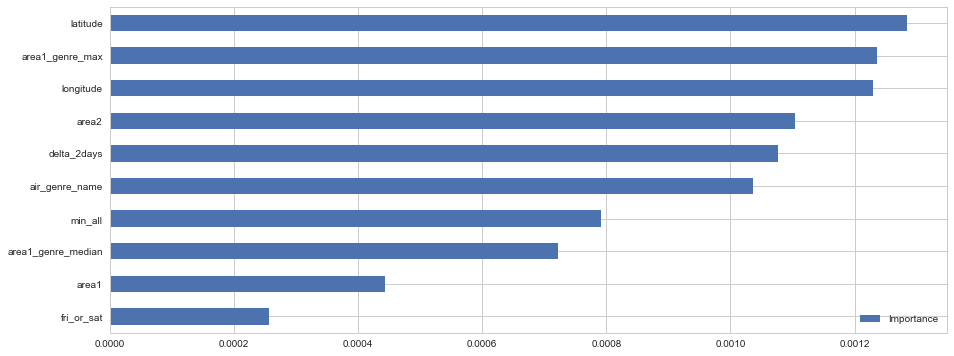

In [54]:
model_params = {'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 60}
forest, pred_testy = random_forest(train_x,train_y,test_x,**model_params)
rmsle(test_y,pred_testy)
plot_rf_importance(forest)

In [75]:
k = 5
model = "random_forest"
model_params = {'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 60}
error = cv_rmsle(k, model, Xtrain,Ytrain,**model_params)
error

finish 0 round of random_forest, rmlse = 0.5290823608300581
finish 1 round of random_forest, rmlse = 0.5246652121727116
finish 2 round of random_forest, rmlse = 0.5257260389669902
finish 3 round of random_forest, rmlse = 0.524598327703107
finish 4 round of random_forest, rmlse = 0.5254261580917903


[0.5290823608300581,
 0.5246652121727116,
 0.5257260389669902,
 0.524598327703107,
 0.5254261580917903]

## Random forest final result

In [35]:
forest, pred_y = random_forest(Xtrain,Ytrain,Xtest,**parms)
sample_submission["visitors"] = pred_y
sample_submission["visitors"] = sample_submission["visitors"].apply(lambda x: 0 if x<0 else x)
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,2.009557
1,air_00a91d42b08b08d9_2017-04-24,20.573762
2,air_00a91d42b08b08d9_2017-04-25,23.444297
3,air_00a91d42b08b08d9_2017-04-26,27.120910
4,air_00a91d42b08b08d9_2017-04-27,29.414499


In [37]:
sample_submission.to_csv("../output/rf2.csv",index=False)

# XGBoost

In [55]:
import xgboost as xgb

In [56]:
def opt_num_boost_round(train_x,train_y,xgb_params):
    dtrain = xgb.DMatrix(train_x, train_y)
    cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=200, early_stopping_rounds=100,
        verbose_eval=20, show_stdv=False)
    cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
    
def xgb_model(train_x,train_y,test_x,xgb_params,num_round):
    dtrain = xgb.DMatrix(train_x, train_y)
    xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_round)
    pred = xgb_model.predict(xgb.DMatrix(test_x))
    return xgb_model,pred

[0]	train-rmse:25.404	test-rmse:25.4138
[20]	train-rmse:13.5146	test-rmse:13.7489
[40]	train-rmse:10.8605	test-rmse:11.3345
[60]	train-rmse:10.3354	test-rmse:10.9689
[80]	train-rmse:10.1725	test-rmse:10.9143
[100]	train-rmse:10.077	test-rmse:10.9057
[120]	train-rmse:10.0145	test-rmse:10.9107
[140]	train-rmse:9.96233	test-rmse:10.9117
[160]	train-rmse:9.91649	test-rmse:10.9213
[180]	train-rmse:9.87467	test-rmse:10.9274


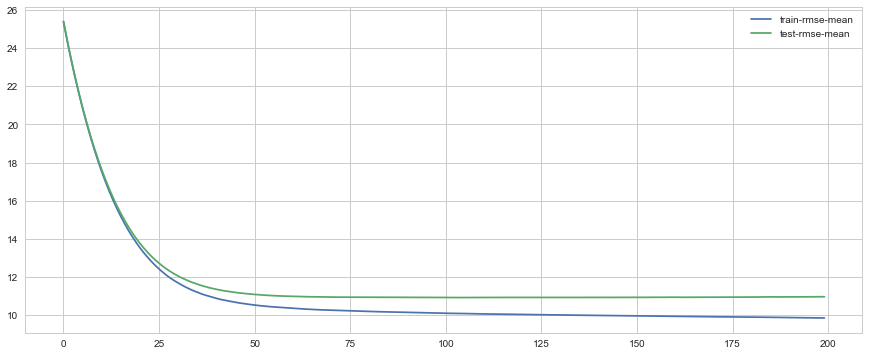

In [58]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
opt_num_boost_round(train_x,train_y,xgb_params)

In [70]:
xgboost_model, pred_testy = xgb_model(train_x,train_y,test_x,xgb_params,70)
rmsle(test_y,pred_testy)

0.5188391113377732

In [ ]:
k = 2
model = "xgb_model"
model_params = {
   "xgb_params": xgb_params,
    "num_round": 60
}
error = cv_rmsle(k, model, Xtrain,Ytrain,**model_params)
error

## XGBoost final result

In [186]:
xgboost_model,pred_y = xgb_model(Xtrain,Ytrain,Xtest,xgb_params,60)
sample_submission["visitors"] = pred_y
sample_submission["visitors"] = sample_submission["visitors"].apply(lambda x: 0 if x<0 else x)
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,2.210022
1,air_00a91d42b08b08d9_2017-04-24,19.903069
2,air_00a91d42b08b08d9_2017-04-25,22.702095
3,air_00a91d42b08b08d9_2017-04-26,26.485523
4,air_00a91d42b08b08d9_2017-04-27,28.022711


In [187]:
sample_submission.to_csv("../output/xgb2.csv",index=False)

## Save Model

In [73]:
xgboost_model.save_model('../model/xgb01.model')

In [74]:
xgb_load = xgb.Booster({'nthread':4}) #init model
xgb_load.load_model("../model/xgb01.model") # load data

In [75]:
t = xgb_load.predict(xgb.DMatrix(test_x))
t[0:10]

array([40.130116 , 18.283983 ,  4.3569803, 16.677538 , 15.490668 ,
       19.894827 , 12.531885 , 19.359957 ,  9.284155 , 12.360618 ],
      dtype=float32)

## Times Series Model Notes
- Need to make sure data is stationary (there is no upward or downward trend). Test stationarity using Dicky-Fuller Test (sample Codes as below). In our case, we should figure out a way to asjust for the two huge gaps.

- ARIMA model: https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/


In [10]:
# Dicky Fuller Test
'''
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
'''

"\n# difference data\nmonths_in_year = 12\nstationary = difference(X, months_in_year)\nstationary.index = series.index[months_in_year:]\n# check if stationary\nresult = adfuller(stationary)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\n"